In [15]:
#Auteur Khéo
import pandas as pd 
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('total.csv', index_col=0)
df

,date,titre,budget,recette,duree,genres,synopsis,tagline,realisateur,casting,compagnies_production,suite,production_countries,langues,imdb_id,vote_average,vote_count,status
0,2014-11-12,Dumb and Dumber To,40000000,169837010,110,['Comedy'],"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,"['Bobby Farrelly', 'Peter Farrelly']","['Jim Carrey', 'Jeff Daniels', 'Laurie Holden'...","['New Line Cinema', 'Universal Pictures', 'Con...",3,['US'],['en'],tt2096672,5.542,2740,Released
1,2004-11-11,Марс,2000000,240000,100,"['Comedy', 'Drama']","Somewhere deep, deep in Russia there is a town...",NaN,['Anna Melikyan'],"['Nana Kiknadze', 'Artur Smolyaninov', 'Yevgen...","['Central Partnership', 'Studio SLON']",1,['RU'],['ru'],tt0417949,5.700,3,Released
2,2014-01-22,"I, Frankenstein",65000000,76801179,92,"['Horror', 'Thriller']","200 years after his shocking creation, Dr. Fra...","In the battle between good and evil, an immort...",[],"['Aaron Eckhart', 'Yvonne Strahovski', 'Bill N...","['Lakeshore Entertainment', 'Sidney Kimmel Ent...",1,"['AU', 'US']",['en'],tt1418377,5.272,1628,Released
3,2014-03-20,Captain America: The Winter Soldier,170000000,714766572,136,"['Action', 'Adventure', 'Science Fiction']",After the cataclysmic events in New York with ...,In heroes we trust.,"['Anthony Russo', 'Joe Russo']","['Chris Evans', 'Scarlett Johansson', 'Sebasti...",['Marvel Studios'],2,['US'],['en'],tt1843866,7.678,16638,Released
4,2013-09-11,Vikingdom,15600000,747872,114,['Adventure'],A warrior fleeing the violence of his past mus...,Live by the Sword.,[],"['Dominic Purcell', 'Natassia Malthe', 'Craig ...",['KRU Studios'],1,['MY'],"['en', 'zh']",tt1785669,4.380,54,Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,2022-12-23,No One Stays Good,16000,20000,70,"['Drama', 'Thriller']","Two brothers, Kurt and Ron Gilman make a ploy ...","This Christmas, keep your friends close, but y...",['Antonio Cavallos'],"['Cody Martin', 'Bryce Martin', 'Karla Martin'...",['Impact Films'],1,['US'],['en'],NaN,0.000,0,NaN
11239,NaN,Flying Over Kauai,15000,15000,85,[],"""Flying Over Kauai"" transports viewers on a vi...",Nature Relaxation - Flying Over Kauai 4K,[],[],[],1,[],[],NaN,0.000,0,NaN
11240,2021-05-07,Long Live Anderbros,75,75,75,['Documentary'],This documentary follows 9 life long friends a...,"Almost Heaven, West Virgina",['Bryce Long'],"['Bryce Long', 'Riley Dixon', 'Alex Redding', ...",['united states of america'],1,[],['en'],NaN,0.000,0,NaN
11241,1955-07-19,Amleto,500,550,0,['Drama'],NaN,NaN,['Claudio Fino'],['Vittorio Gassman'],[],1,[],['it'],tt1696200,7.500,1,NaN


[Text(0, 0, '1900-1970'),
 Text(1, 0, '1970-1990'),
 Text(2, 0, '1990-2000'),
 Text(3, 0, '2000-2010'),
 Text(4, 0, '2010-2015'),
 Text(5, 0, '2015-2022')]

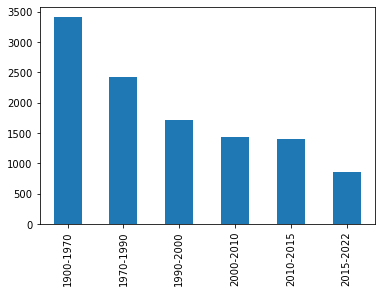

<Figure size 1440x1440 with 0 Axes>

In [17]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df.date.dt.year

#On trie par intervalle de temps
figure, ax = plt.subplots(1,1)
figure = plt.figure(figsize=(20,20))
df['periode'] = np.digitize(df['year'], [1970, 1990, 2000, 2010, 2015], right=True) + 1
df['periode'].value_counts().plot(kind = 'bar', ax=ax)
ax.set_xticklabels( ('1900-1970', '1970-1990','1990-2000', '2000-2010', '2010-2015', '2015-2022') )

<AxesSubplot:>

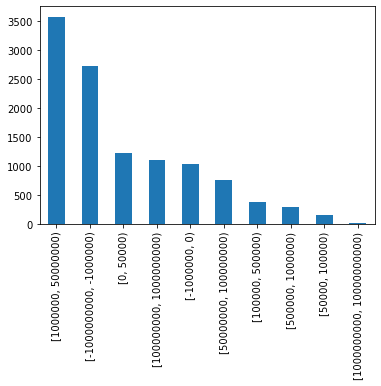

In [18]:
#Compter l'ensemble des films qui sont rentables

df['benef'] = df['recette'] - df['budget']

"""figure, ax = plt.subplots(1,1)
figure = plt.figure(figsize=(20,20))

df['tranche_benef'] = np.digitize(df['benef'], [-1000000,0,50000, 100000, 500000, 1000000], right=True) + 1
df['benef'].value_counts().plot(kind = 'bar', ax=ax)
ax.set_xticklabels( ('-1000000','-1000000 - 0', '0-50000', '50000-100000','100000-500000', '500000-1000000', '+1000000') )"""
#df['benef'].hist(bins=[-1000000,0,50000, 100000, 500000, 1000000])

bin_range = [-1000000000,-1000000,0,50000, 100000, 500000,1000000, 50000000, 100000000, 1000000000, 10000000000]
out, bins  = pd.cut(df['benef'], bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()


In [19]:
df2 = df['recette'] - df['budget'] >0
df2.value_counts()

True     7028
False    4215
dtype: int64

In [20]:
df.describe()

,budget,recette,duree,suite,vote_average,vote_count,year,periode,benef
count,1.124300e+04,1.124300e+04,11243.000000,11243.000000,11243.000000,11243.000000,10764.000000,11243.000000,1.124300e+04
mean,1.983398e+07,1.026692e+08,99.102642,1.213466,5.885490,1161.976786,2000.198811,3.918438,8.283526e+07
std,5.916790e+07,5.094201e+09,41.655851,1.081359,2.200703,2544.945919,18.476249,1.526910,5.094008e+09
min,0.000000e+00,-1.200000e+01,0.000000,1.000000,0.000000,0.000000,1902.000000,1.000000,-5.000000e+09
25%,3.000000e+05,1.898170e+05,90.000000,1.000000,5.593000,24.000000,1993.000000,3.000000,-9.000000e+05
50%,6.000000e+06,7.137503e+06,101.000000,1.000000,6.350000,242.000000,2005.000000,4.000000,7.000000e+05
75%,2.200000e+07,4.204247e+07,117.000000,1.000000,7.034500,1060.000000,2013.000000,5.000000,2.269113e+07
max,5.000000e+09,5.400000e+11,999.000000,34.000000,10.000000,32480.000000,2024.000000,6.000000,5.399970e+11


In [30]:
df3 = df["year"] >= 2000
df3.value_counts()

True     9545
False    1698
Name: year, dtype: int64